# Alphashots assignment :

1. Scrape the EUR/INR currency data from Yahoo Finance, covering the period from January 1, 2023, to sept 30, 2024.

2. Conduct a technical analysis and calculate the following metrics for one day and one week from Sept 30,2024
- Moving Average
- Bollinger Band
- CCI (Commodity Channel Index)
Note: Please consult various online sources to understand how to perform technical analysis on the currency market.

3. Based on the results of the technical indicators, make a decision to BUY, SELL or remain NEUTRAL? for the specified time frames.


>## Assumptions:

Took 20 day MA as standard because the frequency of data is daily

Moving Average period: 20 days and 50 days
Bollinger Bands: 20-day period with 2 standard deviations
CCI: 20-day period with standard thresholds of +100 and -100


Signal Generation Rules:


>Moving Average:

BUY when price is above 20 MA > 50 MA
SELL when price is below 20 MA < 50 MA
Else NEUTRAL


>Bollinger Bands:

BUY when price touches lower band
SELL when price touches upper band
NEUTRAL when price is between bands


>CCI:

BUY when CCI < -100 (oversold)
SELL when CCI > 100 (overbought)
NEUTRAL when CCI is between -100 and 100


# Importing  data from yahoo finance :

In [ ]:
# import libraries :

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

>**Time period is between jan 1 2023 to october 9 2024 (one week after september 30 including all the holidays)**

In [ ]:
def fetch_currency_data():
    """Fetch EUR/INR data from Yahoo Finance"""
    euroinr = yf.download("EURINR=X",
                         start="2023-01-01",
                         end="2024-10-9",
                         interval="1d")
    return euroinr


# Data pre-processing :

>**Pre-processing needs to be done manually i.e cleaning the data , type conversion and Bringing the data to structured format  :**

In [ ]:
# store it in csv [intial version]
euroinr = fetch_currency_data()
euroinr.to_csv("euroinr.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv("euroinr.csv")
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-02 00:00:00+00:00,88.48200225830078,88.48200225830078,88.4000015258789,87.15769958496094,87.15769958496094,0
3,2023-01-03 00:00:00+00:00,88.30000305175781,88.30000305175781,88.31300354003906,87.22599792480469,88.29199981689453,0
4,2023-01-04 00:00:00+00:00,87.21900177001953,87.21900177001953,87.9229965209961,87.21900177001953,87.21900177001953,0


In [ ]:
df.shape

(464, 7)

In [ ]:
df.tail(7)

,Price,Adj Close,Close,High,Low,Open,Volume
457,2024-09-30 00:00:00+00:00,93.36900329589844,93.36900329589844,93.83999633789062,92.41400146484375,92.41400146484375,0
458,2024-10-01 00:00:00+00:00,93.23400115966797,93.23400115966797,93.30999755859375,92.68599700927734,93.24099731445312,0
459,2024-10-02 00:00:00+00:00,92.71399688720703,92.71399688720703,92.98999786376953,92.572998046875,92.72100067138672,0
460,2024-10-03 00:00:00+00:00,92.61799621582031,92.61799621582031,92.80000305175781,92.43399810791016,92.60800170898438,0
461,2024-10-04 00:00:00+00:00,92.63400268554688,92.63400268554688,92.64399719238281,91.98500061035156,92.63700103759766,0
462,2024-10-07 00:00:00+00:00,92.14299774169922,92.14299774169922,92.18299865722656,91.53500366210938,91.53500366210938,0
463,2024-10-08 00:00:00+00:00,92.05500030517578,92.05500030517578,92.23300170898438,91.97000122070312,92.06500244140625,0


In [ ]:
df.isna().sum()

,0
Price,0
Adj Close,1
Close,1
High,1
Low,1
Open,1
Volume,1


In [ ]:
# remove nan
df = df.dropna()

In [ ]:
df.head(3)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
2,2023-01-02 00:00:00+00:00,88.48200225830078,88.48200225830078,88.4000015258789,87.15769958496094,87.15769958496094,0
3,2023-01-03 00:00:00+00:00,88.30000305175781,88.30000305175781,88.31300354003906,87.22599792480469,88.29199981689453,0


In [ ]:
# drop first row
df = df.drop(0)

In [ ]:
# reset index
df = df.reset_index(drop=True)

In [ ]:
# Type conversion :
df["Close"] = df["Close"].astype(float)
df["High"] = df["High"].astype(float)
df["Low"] = df["Low"].astype(float)

In [ ]:
df = df.rename(columns={'Price': 'calender_date'})

df['calender_date'] = pd.to_datetime(df['calender_date'])

df = df.set_index('calender_date')

In [ ]:
df.drop(["Adj Close","Volume"], axis=1, inplace=True)

>Final version of the data after pre-processing , stored in csv format

In [ ]:
# [Final -version after pre-processing]
df.to_csv("euroinr_final.csv")

# Calculating moving averages and it's signals :

In [ ]:
def calculate_moving_averages(data):
    """Calculate 20-day and 50-day moving averages and generate signals"""
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()

    # Generate MA signals
    data['MA_Signal'] = 'NEUTRAL'
    data.loc[data['MA20'] > data['MA50'], 'MA_Signal'] = 'BUY'
    data.loc[data['MA20'] < data['MA50'], 'MA_Signal'] = 'SELL'

    return data


In [ ]:
# calling moving average :
df = calculate_moving_averages(df)

In [ ]:
df["MA20"].isna().sum()
# the first twenty values shows NA since we are taking average of them

19

In [ ]:
df["MA_Signal"].value_counts()

,count
MA_Signal,
BUY,238
SELL,175
NEUTRAL,49


# Bollinger bands and it's signals :

In [ ]:
def calculate_bollinger_bands(data, period=20, std_dev=2):
    """Calculate Bollinger Bands and generate signals"""
    data['BB_middle'] = data['Close'].rolling(window=period).mean()

    rolling_std = data['Close'].rolling(window=period).std()

    data['BB_upper'] = data['BB_middle'] + (rolling_std * std_dev)
    data['BB_lower'] = data['BB_middle'] - (rolling_std * std_dev)

    # Generate BB signals

    data['BB_Signal'] = 'NEUTRAL'
    data.loc[data['Close'] < data['BB_lower'], 'BB_Signal'] = 'BUY'
    data.loc[data['Close'] > data['BB_upper'], 'BB_Signal'] = 'SELL'

    return data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 2023-01-02 00:00:00+00:00 to 2024-10-08 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      462 non-null    float64
 1   High       462 non-null    float64
 2   Low        462 non-null    float64
 3   Open       462 non-null    object 
 4   MA20       443 non-null    float64
 5   MA50       413 non-null    float64
 6   MA_Signal  462 non-null    object 
dtypes: float64(5), object(2)
memory usage: 28.9+ KB


In [ ]:
df = calculate_bollinger_bands(df)

In [ ]:
df.head(3)

,Close,High,Low,Open,MA20,MA50,MA_Signal,BB_middle,BB_upper,BB_lower,BB_Signal
calender_date,,,,,,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.400002,87.157700,87.15769958496094,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL
2023-01-03 00:00:00+00:00,88.300003,88.313004,87.225998,88.29199981689453,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL
2023-01-04 00:00:00+00:00,87.219002,87.922997,87.219002,87.21900177001953,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL


In [ ]:
df["BB_Signal"].value_counts()

,count
BB_Signal,
NEUTRAL,425
BUY,19
SELL,18


# CCI - Commodity Channel Index calculation :

In [ ]:
def calculate_cci(data, period=20):

    typical_price = (data['High'] + data['Low'] + data['Close']) / 3

    sma_tp = typical_price.rolling(window=period).mean()

    mad = typical_price.rolling(window=period).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)

    data['CCI'] = (typical_price - sma_tp) / (0.015 * mad)

    # Generate CCI signals
    data['CCI_Signal'] = 'NEUTRAL'
    data.loc[data['CCI'] < -100, 'CCI_Signal'] = 'BUY'
    data.loc[data['CCI'] > 100, 'CCI_Signal'] = 'SELL'

    return data


In [ ]:
df = calculate_cci(df)

In [ ]:
df.head(3)

,Close,High,Low,Open,MA20,MA50,MA_Signal,BB_middle,BB_upper,BB_lower,BB_Signal,CCI,CCI_Signal
calender_date,,,,,,,,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.400002,87.157700,87.15769958496094,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL
2023-01-03 00:00:00+00:00,88.300003,88.313004,87.225998,88.29199981689453,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL
2023-01-04 00:00:00+00:00,87.219002,87.922997,87.219002,87.21900177001953,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL


In [ ]:
df["CCI_Signal"].value_counts()

,count
CCI_Signal,
NEUTRAL,284
SELL,101
BUY,77


# Analyzing metrics for one day and one week from Sept 30,2024 :

In [ ]:
df.head(4)

,Close,High,Low,Open,MA20,MA50,MA_Signal,BB_middle,BB_upper,BB_lower,BB_Signal,CCI,CCI_Signal
calender_date,,,,,,,,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.400002,87.157700,87.15769958496094,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL
2023-01-03 00:00:00+00:00,88.300003,88.313004,87.225998,88.29199981689453,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL
2023-01-04 00:00:00+00:00,87.219002,87.922997,87.219002,87.21900177001953,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL
2023-01-05 00:00:00+00:00,87.605003,87.807999,86.757004,87.58000183105469,NaN,NaN,NEUTRAL,NaN,NaN,NaN,NEUTRAL,NaN,NEUTRAL


In [ ]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'MA20', 'MA50', 'MA_Signal',
       'BB_middle', 'BB_upper', 'BB_lower', 'BB_Signal', 'CCI', 'CCI_Signal'],
      dtype='object')

In [ ]:
df.tail(7)

,Close,High,Low,Open,MA20,MA50,MA_Signal,BB_middle,BB_upper,BB_lower,BB_Signal,CCI,CCI_Signal
calender_date,,,,,,,,,,,,,
2024-09-30 00:00:00+00:00,93.369003,93.839996,92.414001,92.41400146484375,92.93350,92.306294,BUY,92.93350,93.661526,92.205475,NEUTRAL,76.245232,NEUTRAL
2024-10-01 00:00:00+00:00,93.234001,93.309998,92.685997,93.24099731445312,92.95515,92.349934,BUY,92.95515,93.692281,92.218019,NEUTRAL,34.504204,NEUTRAL
2024-10-02 00:00:00+00:00,92.713997,92.989998,92.572998,92.72100067138672,92.95695,92.389454,BUY,92.95695,93.691403,92.222497,NEUTRAL,-57.658870,NEUTRAL
2024-10-03 00:00:00+00:00,92.617996,92.800003,92.433998,92.60800170898438,92.93925,92.428134,BUY,92.93925,93.689077,92.189422,NEUTRAL,-87.696499,NEUTRAL
2024-10-04 00:00:00+00:00,92.634003,92.643997,91.985001,92.63700103759766,92.90895,92.465334,BUY,92.90895,93.656579,92.161321,NEUTRAL,-124.517061,BUY
2024-10-07 00:00:00+00:00,92.142998,92.182999,91.535004,91.53500366210938,92.86505,92.510382,BUY,92.86505,93.684625,92.045474,NEUTRAL,-202.447629,BUY
2024-10-08 00:00:00+00:00,92.055000,92.233002,91.970001,92.06500244140625,92.83905,92.540762,BUY,92.83905,93.727469,91.950631,NEUTRAL,-148.100182,BUY


In [ ]:
df.to_csv("euroinr_all_indicators.csv")

In [ ]:
def analyze_currency(data):
    """Main analysis function"""

    # data = fetch_currency_data()
    '''If we run on jupiter notebook-  these functions have already been called - so commenting for now'''
    # Calculate indicators

    #data = calculate_moving_averages(data)

    #data = calculate_bollinger_bands(data)
    #data = calculate_cci(data)

    # Get last day's value i.e : day after september 30
    last_day = data.iloc[-6]

    # week after september 30 :  gandhi jayanti is holiday so considering last days
    last_week = data.iloc[-6:]

    # Prepare analysis summary
    summary = {
        'One Day Analysis': {
            'Date': last_day.name.strftime('%Y-%m-%d'),
            'Close': last_day['Close'],
            'MA20': last_day['MA20'],
            'MA50': last_day['MA50'],
            'BB_upper': last_day['BB_upper'],
            'BB_lower': last_day['BB_lower'],
            'CCI': last_day['CCI'],
            'Signals': {
                'Moving Average Signal': last_day['MA_Signal'],
                'Bollinger Bands Signal': last_day['BB_Signal'],
                'CCI Signal': last_day['CCI_Signal'] }},

        'One Week Analysis': {
            'Period': f"{last_week.index[0].strftime('%Y-%m-%d')} to {last_week.index[-1].strftime('%Y-%m-%d')}",
            'Average Close': last_week['Close'].mean(),
            'Average MA20': last_week['MA20'].mean(),
            'Average MA50': last_week['MA50'].mean(),
            'Average BB_upper': last_week['BB_upper'].mean(),
            'Average BB_lower': last_week['BB_lower'].mean(),
            'Average CCI': last_week['CCI'].mean(),
            'Signals': {
                'Moving Average Signal': last_week['MA_Signal'].mode()[0],  # Most frequent signal
                'Bollinger Bands Signal': last_week['BB_Signal'].mode()[0],  # Most frequent signal
                'CCI Signal': last_week['CCI_Signal'].mode()[0] }  # Most frequent signal
        }
    }

    print(summary)

    return summary

In [ ]:
analyze_currency(df)

{'One Day Analysis': {'Date': '2024-10-01', 'Close': 93.23400115966797, 'MA20': 92.95515022277831, 'MA50': 92.34993423461914, 'BB_upper': 93.6922811294176, 'BB_lower': 92.21801931613903, 'CCI': 34.50420441011832, 'Signals': {'Moving Average Signal': 'BUY', 'Bollinger Bands Signal': 'NEUTRAL', 'CCI Signal': 'NEUTRAL'}}, 'One Week Analysis': {'Period': '2024-10-01 to 2024-10-08', 'Average Close': 92.5663324991862, 'Average MA20': 92.91073328653971, 'Average MA50': 92.44733347574869, 'Average BB_upper': 93.69023907796526, 'Average BB_lower': 92.1312274951142, 'Average CCI': -97.65267282920958, 'Signals': {'Moving Average Signal': 'BUY', 'Bollinger Bands Signal': 'NEUTRAL', 'CCI Signal': 'BUY'}}}


{'One Day Analysis': {'Date': '2024-10-01',
  'Close': 93.23400115966797,
  'MA20': 92.95515022277831,
  'MA50': 92.34993423461914,
  'BB_upper': 93.6922811294176,
  'BB_lower': 92.21801931613903,
  'CCI': 34.50420441011832,
  'Signals': {'Moving Average Signal': 'BUY',
   'Bollinger Bands Signal': 'NEUTRAL',
   'CCI Signal': 'NEUTRAL'}},
 'One Week Analysis': {'Period': '2024-10-01 to 2024-10-08',
  'Average Close': 92.5663324991862,
  'Average MA20': 92.91073328653971,
  'Average MA50': 92.44733347574869,
  'Average BB_upper': 93.69023907796526,
  'Average BB_lower': 92.1312274951142,
  'Average CCI': -97.65267282920958,
  'Signals': {'Moving Average Signal': 'BUY',
   'Bollinger Bands Signal': 'NEUTRAL',
   'CCI Signal': 'BUY'}}}

# Final day and week Analysis :

In [ ]:
def tidy(data):

    # Get last day's value i.e : day after september 30
    last_day = data.iloc[-6]

    # week after september 30 :  gandhi jayanti is holiday so considering last days
    last_week = data.iloc[-6:]


    summary_data = {
        'Date': last_day.name.strftime('%Y-%m-%d'),
        'Close': last_day['Close'],
        'MA20': last_day['MA20'],
        'MA50': last_day['MA50'],
        'BB_upper': last_day['BB_upper'],
        'BB_lower': last_day['BB_lower'],
        'CCI': last_day['CCI']
    }

    summary = pd.DataFrame.from_dict(summary_data, orient='index', columns=['One Day Analysis'])
    summary = summary.T  # Transpose for better readability

    # Add one-week analysis
    one_week_summary = pd.DataFrame({
        'Period': f"{last_week.index[0].strftime('%Y-%m-%d')} to {last_week.index[-1].strftime('%Y-%m-%d')}",
        'Average Close': last_week['Close'].mean(),
        'Average MA20': last_week['MA20'].mean(),
        'Average MA50': last_week['MA50'].mean(),
        'Average BB_upper': last_week['BB_upper'].mean(),
        'Average BB_lower': last_week['BB_lower'].mean(),
        'Average CCI': last_week['CCI'].mean()
    }, index=['One Week Analysis'])

    # Concatenate one-day and one-week summaries
    summary = pd.concat([summary, one_week_summary])

    # Prepare signal DataFrame
    signals_df = pd.DataFrame({
        'Day after sep-30': [last_day['MA_Signal'], last_day['BB_Signal'], last_day['CCI_Signal']],
        ' Week after sep-30': [last_week['MA_Signal'].mode()[0], last_week['BB_Signal'].mode()[0], last_week['CCI_Signal'].mode()[0]]
    }, index=['Moving Average', 'Bollinger Bands', 'CCI'])

    # Print the summary as a table
    print(f"Day after september-30 : {summary_data['Date']},\n\nWeek after september-30 : {one_week_summary['Period']}\n\n")
    print(signals_df)
    #return summary, signals_df


>**Individual Indicators giving signals :**

In [ ]:
tidy(df)

Day after september-30 : 2024-10-01,

Week after september-30 : One Week Analysis    2024-10-01 to 2024-10-08
Name: Period, dtype: object


                Day after sep-30  Week after sep-30
Moving Average               BUY                BUY
Bollinger Bands          NEUTRAL            NEUTRAL
CCI                      NEUTRAL                BUY


# Display Graphs :

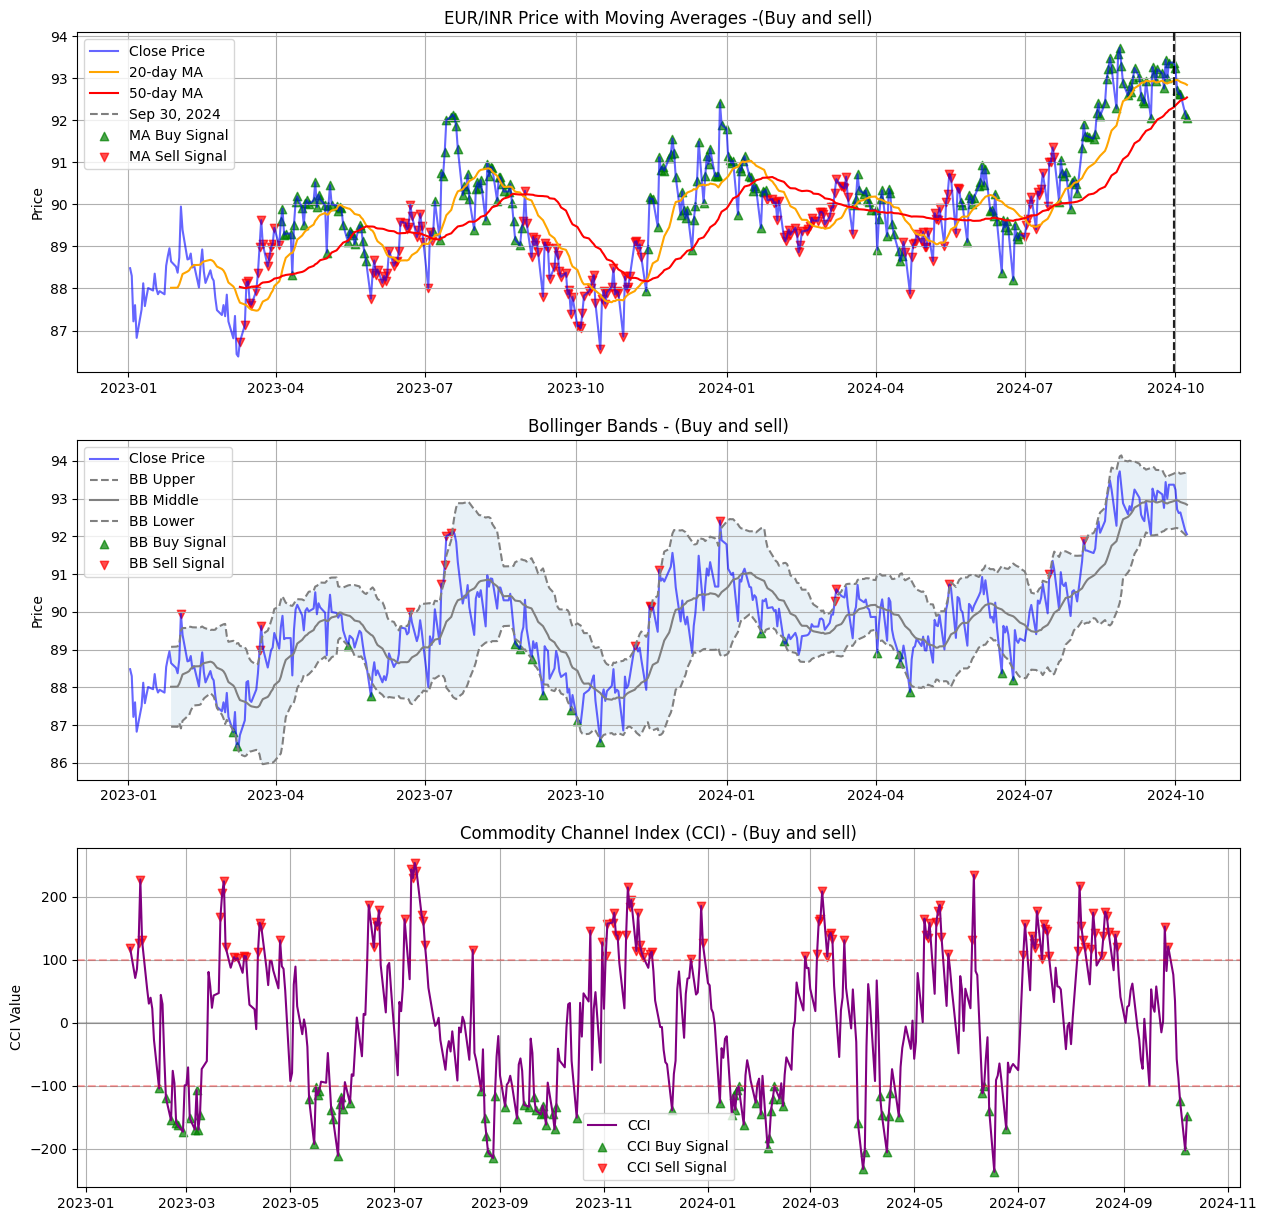

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_analysis(data):


    # subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

    vertical_line_date = datetime(2024, 9, 30)

    #  Moving Averages
    ax1.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.6)
    ax1.plot(data.index, data['MA20'], label='20-day MA', color='orange')
    ax1.plot(data.index, data['MA50'], label='50-day MA', color='red')

    ax1.axvline(x=vertical_line_date, color='black', linestyle='--', alpha=0.5, label='Sep 30, 2024')

    # Marking MA signals
    buy_signals = data[data['MA_Signal'] == 'BUY'].index
    sell_signals = data[data['MA_Signal'] == 'SELL'].index
    ax1.scatter(buy_signals, data.loc[buy_signals, 'Close'], color='green', marker='^',
                label='MA Buy Signal', alpha=0.7)
    ax1.scatter(sell_signals, data.loc[sell_signals, 'Close'], color='red', marker='v',
                label='MA Sell Signal', alpha=0.7)

    ax1.set_title('EUR/INR Price with Moving Averages -(Buy and sell)')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # Bollinger Bands
    ax2.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.6)
    ax2.plot(data.index, data['BB_upper'], label='BB Upper', color='gray', linestyle='--')
    ax2.plot(data.index, data['BB_middle'], label='BB Middle', color='gray')
    ax2.plot(data.index, data['BB_lower'], label='BB Lower', color='gray', linestyle='--')
    ax2.fill_between(data.index, data['BB_upper'], data['BB_lower'], alpha=0.1)

    ax1.axvline(x=vertical_line_date, color='black', linestyle='--', alpha=0.5, label='Sep 30, 2024')


    # Marking BB signals
    bb_buy_signals = data[data['BB_Signal'] == 'BUY'].index
    bb_sell_signals = data[data['BB_Signal'] == 'SELL'].index
    ax2.scatter(bb_buy_signals, data.loc[bb_buy_signals, 'Close'], color='green', marker='^',
                label='BB Buy Signal', alpha=0.7)
    ax2.scatter(bb_sell_signals, data.loc[bb_sell_signals, 'Close'], color='red', marker='v',
                label='BB Sell Signal', alpha=0.7)

    ax2.set_title('Bollinger Bands - (Buy and sell)')
    ax2.set_ylabel('Price')
    ax2.legend()
    ax2.grid(True)

    # CCI
    ax3.plot(data.index, data['CCI'], label='CCI', color='purple')
    ax3.axhline(y=100, color='r', linestyle='--', alpha=0.3)
    ax3.axhline(y=-100, color='r', linestyle='--', alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.2)

    ax1.axvline(x=vertical_line_date, color='black', linestyle='--', alpha=0.5, label='Sep 30, 2024')


    # Marking CCI signals
    cci_buy_signals = data[data['CCI_Signal'] == 'BUY'].index
    cci_sell_signals = data[data['CCI_Signal'] == 'SELL'].index
    ax3.scatter(cci_buy_signals, data.loc[cci_buy_signals, 'CCI'], color='green', marker='^',
                label='CCI Buy Signal', alpha=0.7)
    ax3.scatter(cci_sell_signals, data.loc[cci_sell_signals, 'CCI'], color='red', marker='v',
                label='CCI Sell Signal', alpha=0.7)

    ax3.set_title('Commodity Channel Index (CCI) - (Buy and sell)')
    ax3.set_ylabel('CCI Value')
    ax3.legend()
    ax3.grid(True)

    #plt.tight_layout()
    return fig

if __name__ == "__main__":
    fig = plot_analysis(df)
    # For Jupyter notebooks:
    from IPython.display import display
    display(fig)
    plt.close(fig)


| Indicator       | Day after sep 30 | Week after sep 30 |
|:---------------|:----------------:|:----------------:|
| Moving Average |       BUY        |       BUY        |
| Bollinger Bands|     NEUTRAL      |     NEUTRAL      |
| CCI            |     NEUTRAL      |       BUY        |

#Graphs for oneday after september 30 and week after september 30  :

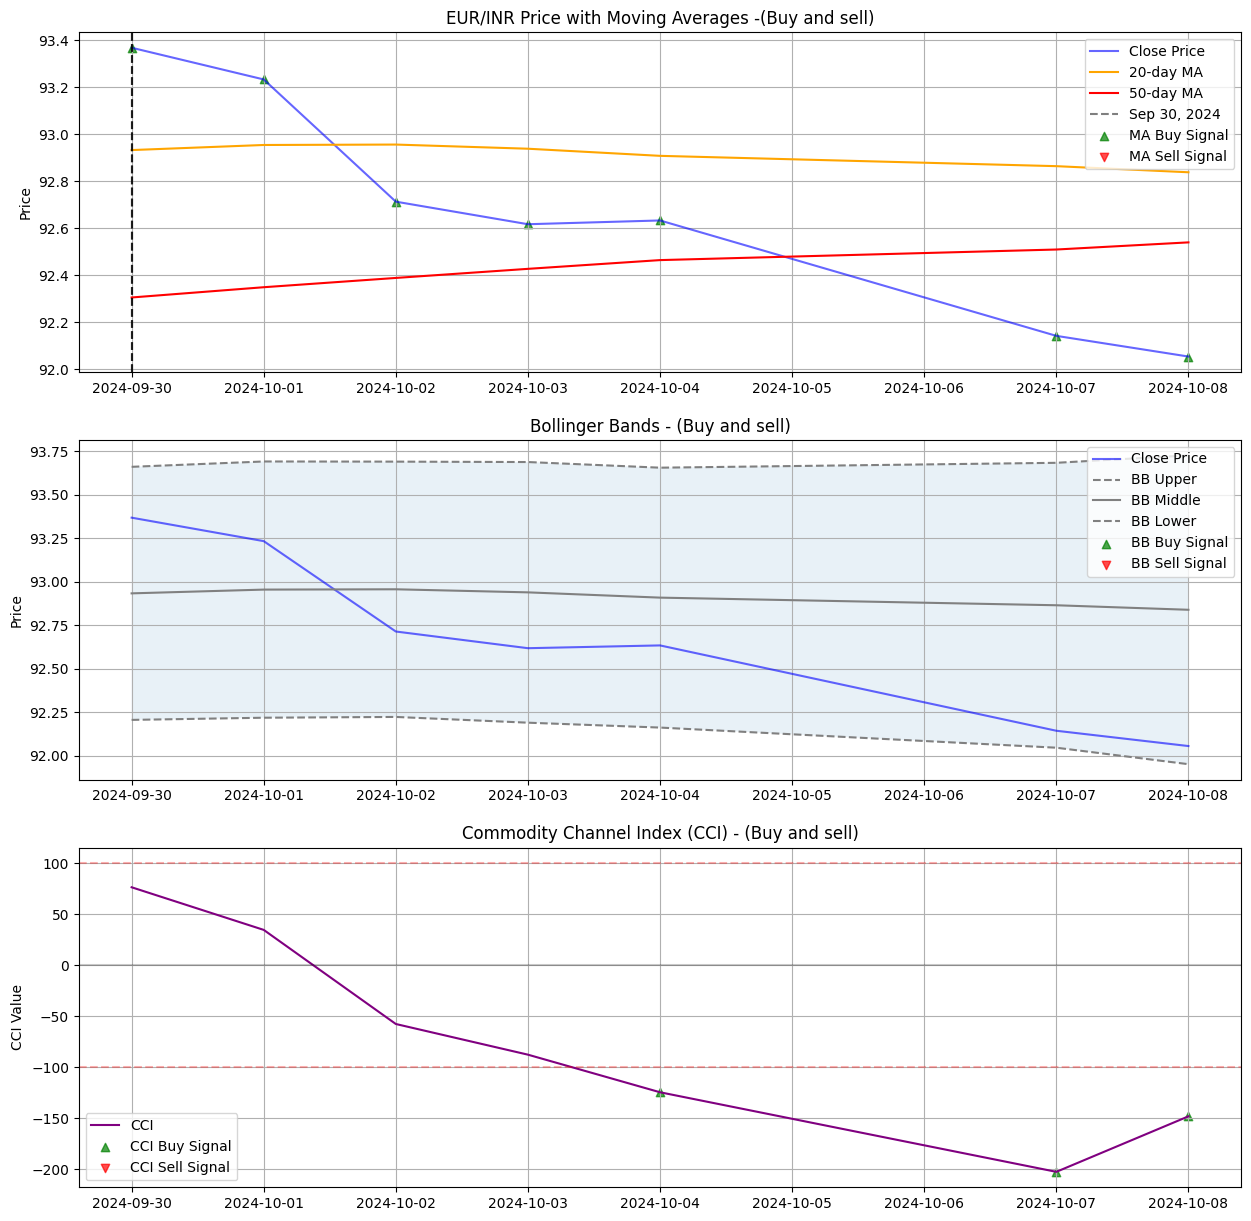

In [ ]:
fig2 = plot_analysis(df.tail(7))
from IPython.display import display
display(fig2)
plt.close(fig2)

In [ ]:
# --- By Mahikshith